In [32]:
from tensorflow.keras.datasets import imdb

In [33]:
vocabulary_size = 5000

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)
print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train), len(X_test)))

Loaded dataset with 25000 training samples, 25000 test samples


In [34]:
print('---review---')
print(len(X_train[5]))
print(X_train[5])
print('---label---')
print(y_train[5])

---review---
43
[1, 778, 128, 74, 12, 630, 163, 15, 4, 1766, 2, 1051, 2, 32, 85, 156, 45, 40, 148, 139, 121, 664, 665, 10, 10, 1361, 173, 4, 749, 2, 16, 3804, 8, 4, 226, 65, 12, 43, 127, 24, 2, 10, 10]
---label---
0


In [35]:
y_train[1]

0

In [36]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print('---review with words---')
print(decode_review(X_train[5]))
print('---label---')
print(y_train[5])

---review with words---
<START> begins better than it ends funny that the russian <UNK> crew <UNK> all other actors it's like those scenes where documentary shots br br spoiler part the message <UNK> was contrary to the whole story it just does not <UNK> br br
---label---
0


In [37]:
print('Maximum review length: {}'.format(
len(max((X_train + X_test), key=len))))

Maximum review length: 2697


In [38]:
print('Minimum review length: {}'.format(
len(min((X_test + X_test), key=len))))

Minimum review length: 14


In [39]:
l=[len(i) for i in X_train]

(array([8.500e+01, 9.070e+02, 1.151e+03, 1.347e+03, 3.731e+03, 3.347e+03,
        2.510e+03, 1.865e+03, 1.426e+03, 1.229e+03, 9.660e+02, 7.700e+02,
        7.270e+02, 6.090e+02, 5.670e+02, 4.210e+02, 3.920e+02, 3.340e+02,
        3.050e+02, 2.780e+02, 2.280e+02, 2.000e+02, 1.670e+02, 1.700e+02,
        1.460e+02, 1.230e+02, 1.050e+02, 1.030e+02, 9.200e+01, 7.300e+01,
        6.800e+01, 7.300e+01, 6.500e+01, 5.200e+01, 4.900e+01, 3.100e+01,
        4.400e+01, 3.200e+01, 4.500e+01, 5.800e+01, 6.500e+01, 1.500e+01,
        2.000e+00, 5.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

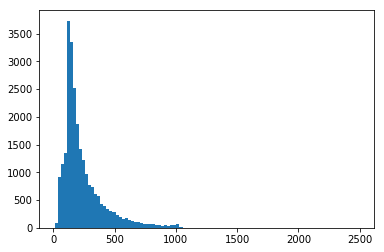

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(l,bins=100)


In [43]:
import numpy as np
np.quantile(l,0.92)

512.0

In [44]:
from tensorflow.keras.preprocessing import sequence

max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [45]:
import numpy as np
X_train[5]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [46]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense

In [47]:
from tensorflow.keras.layers import SimpleRNN as RNN
embedding_vecor_length = 80
model1 = Sequential()
model1.add(Embedding(vocabulary_size, embedding_vecor_length, input_length=max_words))
model1.add(RNN(100))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 80)           400000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 100)               18100     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 418,201
Trainable params: 418,201
Non-trainable params: 0
_________________________________________________________________
None


In [48]:
history = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=256)


Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 45s 2ms/sample - loss: 0.6661 - accuracy: 0.5829 - val_loss: 0.5763 - val_accuracy: 0.7228
Epoch 2/10
25000/25000 [==============================] - 43s 2ms/sample - loss: 0.3899 - accuracy: 0.8314 - val_loss: 0.3634 - val_accuracy: 0.8484
Epoch 3/10
25000/25000 [==============================] - 43s 2ms/sample - loss: 0.2618 - accuracy: 0.8959 - val_loss: 0.3769 - val_accuracy: 0.8432
Epoch 4/10
25000/25000 [==============================] - 43s 2ms/sample - loss: 0.1563 - accuracy: 0.9420 - val_loss: 0.6401 - val_accuracy: 0.7045
Epoch 5/10
25000/25000 [==============================] - 43s 2ms/sample - loss: 0.1358 - accuracy: 0.9506 - val_loss: 0.4777 - val_accuracy: 0.8390
Epoch 6/10
25000/25000 [==============================] - 43s 2ms/sample - loss: 0.0327 - accuracy: 0.9918 - val_loss: 0.5975 - val_accuracy: 0.8090
Epoch 7/10
25000/25000 [==============================] 

In [49]:
scores = model1.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.82612


In [55]:
history.history

{'loss': [0.6660959068107605,
  0.38992584805488584,
  0.26178137946128843,
  0.1562996500492096,
  0.13580283437252044,
  0.03269975005745888,
  0.013219649012684822,
  0.011119241888821125,
  0.005880368650555611,
  0.0017837543065473437],
 'accuracy': [0.58288,
  0.83144,
  0.89592,
  0.942,
  0.9506,
  0.99176,
  0.9974,
  0.99812,
  0.99944,
  0.99996],
 'val_loss': [0.5763004956436157,
  0.36338072967529295,
  0.37694720960140227,
  0.6400900975418091,
  0.47772256008148195,
  0.597521121892929,
  0.6174705233955383,
  0.6612463778877258,
  0.7220170944213867,
  0.7546177491378784],
 'val_accuracy': [0.72284,
  0.8484,
  0.84316,
  0.70448,
  0.839,
  0.80904,
  0.83764,
  0.83232,
  0.82372,
  0.82612]}

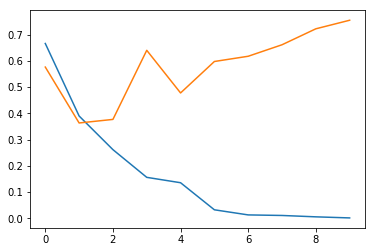

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()